
Assignment Solution- Statistics 2
## Part 1: Frequentist Inference - Estimating the population proportion
1- Let's first check the interpretation of the confidence interval using simulation.

a. Generate 200 random coin flips from a fair coin: p(head)=0.5. You can use scipy.stats.bernoulli by generating 0 or 1 values with equal probability:

In [16]:
from scipy import stats
import numpy as np

In [19]:
from scipy.stats import norm

In [9]:
 dist = stats.bernoulli(0.5)
 flips = dist.rvs(200)

Assume that 1 represents 'head' and '0' represents 'tail'. Using the generated sample, estimate the head probability and compute its corresponding 95% confidence interval.

b. Repeat the same experiment of the previous question for 1000 times. In each time, generate 200 random coin flips from a fair coin, find the 95% confidence interval and check if the true head probability (0.5) is in the confidence interval. How many times did you find that the true head probability is in the computed confidence interval.

In [10]:
## Solution to 1.a.

from scipy import stats
from scipy.stats import norm
import numpy as np

n = 200 # number of samples
dist = stats.bernoulli(0.5)
flips = dist.rvs(n)

# estimate of the head probability
p_head = sum(flips)/len(flips) 
# standard error
sigma = np.sqrt(p_head*(1-p_head)/n)
# critical value corresponding to 95% confidence interval
z_score = norm.ppf((1-0.95)/2)

# 95% confidence interval
interval = (p_head + z_score*sigma, p_head-z_score*sigma)

print("Estimate of the head probability: ",  p_head)
print("95% Confidence interval:", interval)

Estimate of the head probability:  0.505
95% Confidence interval: (0.4357082736287003, 0.5742917263712997)


In [11]:
## solution to 1.b.

num_exp = 1000
#counter to track the number of times the true head probability (0.5) is in the confidence interval
counter = 0 

for i in range(0,num_exp):
    
    flips = dist.rvs(n)
    
    # estimate of the head probability
    p_head = sum(flips)/len(flips) 
    # standard error
    sigma = np.sqrt(p_head*(1-p_head)/n)
    # critical value corresponding to 95% confidence interval
    z_score = norm.ppf((1-0.95)/2)

    # 95% confidence interval
    interval = (p_head + z_score*sigma, p_head-z_score*sigma)
    
    if ((interval[0]<=0.5) and (interval[1]>=0.5)):
        counter +=1


print("Percentage of times the true head probability falled in the confidence interval: {}%".format(100*counter/num_exp))

Percentage of times the true head probability falled in the confidence interval: 95.1%


1- You are now given a biased coin that you can find in src/coin.py. The probability of head, unknown to you, is what you want to estimate. You can use the coin like this:

In [13]:
from coin import Coin

The flip method will return either H or T.

a. Flip the coin for 500 times. Estimate the head probability and compute its corresponding 95% confidence interval.

Save the obtained results of the coin flips (observations) because we will use them in the following question and in the second part.

b. Now let's understand in which sense the point estimate: sample proportion is a good estimate. It can be shown that the sample proportion is the maximum likelihood estimate (MLE), i.e. it is the value under which the observed data is most likely to occur. Let's verify it using simulation and by plotting the likelihood function of all observations:

- Fill in the coin_likelihood function in src/functions.py. It should take one observation (either 'H' or 'T') and the value for head probability p and return a value between 0 and 1. For example, if the data is 'H' and the value of p is 0.3, it should return 0.3. If the data is 'T' and the value of p is 0.3, it should return 0.7.

The coin_likelihood function should be used like this:

coin_likelihood(single_data_point, p)
Here, single_data_point means the result of one coin flip, and p means the value of possible head probability.

- The likelihood function of the observations is viewed as a function defined over all possible values of p. Now p is a continuous non-negative value less than 1. To simulate and plot the likelihood function, we will consider a discrete set of values for p Define a list or array that contains the possible values of p as follows: 0, 0.01, 0.02, ..., 0.99,1. You can use np.linspace.

- For each possible value of p (defined in b.2), compute the likelihood of all observations obtained in (2.a) (hint: product of likelihood of each individual observation). Save the results in an array or list of likelihood values.

- Plot the likelihood function of all observations vs the possible values for head probability. Which value of p maximizes the likelihood function. Is it close to the point estimate you found in (2.a).

In [20]:
## Solution to 2.a

from coin import Coin

num_obs = 500
observations = []

for i in range(0,num_obs):
    mycoin = Coin()
    observations.append(mycoin.flip())

# estimate probability of head
p_head = sum(1 for observation in observations if observation=='H')/num_obs
print("Estimate of the head probability:", p_head)

# standard error
sigma = np.sqrt(p_head*(1-p_head)/num_obs)
# critical value corresponding to 95% confidence interval
z_score = norm.ppf((1-0.95)/2)

# 95% confidence interval
interval = (p_head + z_score*sigma, p_head-z_score*sigma)
print("95% Confidence interval:", interval)

Estimate of the head probability: 0.612
95% Confidence interval: (0.569287532365204, 0.654712467634796)


In [21]:
## Solution to 2.b
def coin_likelihood(single_data_point, p):
    """
    Args:
        single_data_point (str): result of a signle coin flip ('H' or 'T')
        p  (int): head probability
    Returns:
        likelihood (float): the probability of the single_data_point given p.
    """
    if(single_data_point == 'H'):
        return p
    return 1-p

The value of p maximizes the likelihood function is:  0.61


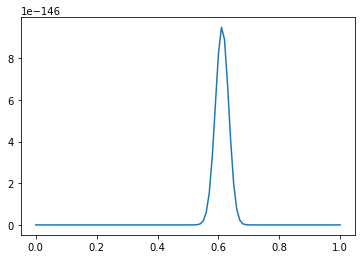

In [22]:
## Solution to 2.b
import matplotlib.pyplot as plt

p = np.linspace(0, 1, 101)
likelihoods = []

for prob in p:
    likelihood = 1
    for observation in observations:
        likelihood = likelihood*coin_likelihood(observation,prob)
    likelihoods.append(likelihood)   

plt.plot(p, likelihoods); 
print("The value of p maximizes the likelihood function is: ",p[np.argmax(likelihoods)])


## Part 2: Bayesian Analysis - Biased Coin
We now switch to the Bayesian approach. For the same data generated in part 1 question 2-a, we would like to estimate the head probability p of the biased coin.

In the Bayesian approach, we start with a prior that reflects our initial belief about the possible values for p. Then we continuously update our belief based on the observed data. Let's first setup the prior and define some functions.

- Prior: We consider a uniform prior for p and encode the prior as a dictionary. Create the prior dictionary that has all the keys in 0, 0.01, 0.02, ..., 0.99,1. The values should all be the same, as an equal probability of each of these keys occurring. You can use np.linspace to get the array of all the keys.

- Fill in the normalize function. It scales the values of the input dictionary v so that they sum to 1. To normalize, you need to find the sum of all the values ofv (not keys) and then divide each value by this sum.

- Fill in the update function. It should take one observation (i.e., the result one coin flip result), a dictionary prior and the coin_likelihood function (that we have defined in the first part). Calculate the likelihood for each possible value of head probability, multiply it with the prior values and use it to update the prior into the posterior probability that should be returned by update. The posterior should now be your prior when you consider the next observation. Make sure to call the normalize method as the final step!

- Use each result of each coin flip generated in part 1 question 2-a to continuously update your belief about the possible values for head probability. Start with the uniform prior, call the update function using the first coin flip result, obtain a posterior and use this latter as a prior when you consider the next coin flip result.

- On a single plot, overlay the initial uniform prior with the posteriors after 1, 10, 50, 250 and 500 flips.

What is the MAP (maximum a posteriori) of the head probability? What is thee 95% credible interval?

In [23]:
def normalize(v):
    '''
    Makes the sum of the probabilities in v equal 1.

    Args: 
        v (dict): each key is a possible parameter value, each value 
                  is the associated non-normalizeed probability of 
                  that parameter value
    Returns: 
        normalized_v (dict): each key is a possible parameter value, each value 
                          is the associated normalized probability of 
                          that parameter value

    '''
    total = sum(v.values())
    normalized_v = {key:value/total for key, value in v.items()}
    return normalized_v

In [24]:
## update function
def update(prior, likelihood_func, single_data_point):
    '''
    Conduct a bayesian update. For each possible parameter value
    in prior, multiply the prior probability by the likelihood
    of the data and return the posterior probability.

    Args:
        prior (dict): each key is a possible parameter value, each value 
                      is the associated normalized probability of 
                      that parameter value
                          
        single_data_point (str): a single observation (data point 'H' or 'T')
            
        likelihood_func (function): takes a new piece of data and a parameter
                                    value, outputs the likelihood of getting
                                    that data given that value of the parameter
                                        
            

    Returns:
        posterior (dict): each key is a possible parameter value, each value 
                          is the associated updated probability of 
                          that parameter value

    '''
    posterior = {key: value*likelihood_func(single_data_point, key)  for key, value in prior.items()}
    posterior = normalize(posterior)
    return posterior

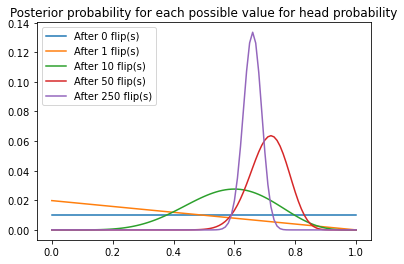

In [25]:
## prior
prior = {prob:1/(len(p)) for prob in p}

##update step
for i, observation in enumerate(observations):
    
    if i in (0, 1, 10, 50, 250, 500):
        plt.plot(prior.keys(), prior.values(), label= "After "+str(i)+" flip(s)")
    plt.legend()
    plt.title("Posterior probability for each possible value for head probability")

    
    posterior = update(prior, coin_likelihood, observation)
    prior = posterior

In [26]:
# option 1
MAP = max(posterior, key = prior.get)
# or option 2
ks = list(posterior.keys())
vs = list(posterior.values())
MAP = ks[np.argmax(vs)]

print(MAP)

0.61


In [27]:
cum_prob = 0
i = 0
cum_prob = vs[i]
while(cum_prob<=0.25):
    i +=1
    cum_prob +=vs[i]

q25 = ks[i-1]
print("The 25-th percentile is approximately:", q25)

The 25-th percentile is approximately: 0.59


In [28]:
while(cum_prob<=0.75):
    i +=1
    cum_prob +=vs[i]

q75 = ks[i-1]
print("The 75-th percentile is approximately:", q75)

The 75-th percentile is approximately: 0.62


In [29]:
print("The 95% credible interval is {}".format((q25, q75)))

The 95% credible interval is (0.59, 0.62)
